In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev
import pandas as pd

In [3]:
# For computation
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from shapely import geometry
from scipy.spatial.distance import directed_hausdorff

In [4]:
DATASTORE_URL = "http://cardshark.cs.berkeley.edu"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sd_la = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "unimodal_trip_car_bike_mtv_la")
sd_sj = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "car_scooter_brex_san_jose")
sd_ucb = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_mtv_ucb")

About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1564644798}
response = <Response [200]>
Found 11 entries
After iterating over 11 entries, entry found
Found spec = Round trip car and bike trip in the South Bay
Evaluation ran from 2019-07-19T17:00:00-07:00 -> 2019-07-30T17:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1564644798}
response = <Response [200]>
Found 11 entries
After iterating over 11 entries, entry found
Found spec = Multi-modal car scooter BREX trip to San Jose
Evaluation ran from 2019-07-19T17:00:00-07:00 -> 2019-07-30T17:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1564644799}
response = <Response [200]>
Found 11 entries
After iterating over 11 entries, entry found
Fou

In [5]:
import importlib
importlib.reload(ezpv)

<module 'emeval.viz.phone_view' from '/Users/harivenugopalan/e-mission-eval-public-data/emeval/viz/phone_view.py'>

In [6]:
pv_la = eipv.PhoneView(sd_la)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563580800, 'end_time': 1564531200}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563580800, 'end_time': 1564531200}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563580800, 'end_time': 1564531200}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564351305.633, 'end_time': 1564360156.392}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564274304.968, 'end_time': 1564282402.886}
response = <Response [200]>
Found 10 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564334125.764, 'end_time': 1564343115.071}
response = <Response [200]>
Found 15 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564351292.705, 'end_time': 1564360115.769}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/battery'], 'start_time': 1564274288.319, 'end_time': 1564282

response = <Response [200]>
Found 1807 entries
Retrieved 1807 entries with timestamps [1564334483, 1564282348, 1564334538, 1564334539, 1564334540, 1564334541, 1564334542, 1564334543, 1564334544, 1564334545]...
About to retrieve data for ucb-sdb-android-2 from 1564341168 -> 1564343115.071
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564341168, 'end_time': 1564343115.071}
response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1564341165, 1564341166, 1564341167, 1564341168]...
About to retrieve data for ucb-sdb-android-2 from 1564341168 -> 1564343115.071
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564341168, 'end_time': 1564343115.071}
response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1564341165, 1564341166, 1564341167, 1564341168]...
About to retrieve data for ucb-sdb-android-2 from 1564351292

response = <Response [200]>
Found 1410 entries
Retrieved 1410 entries with timestamps [1564334602.2875528, 1564334605.343677, 1564334605.35634, 1564334608.9970002, 1564334609.9970446, 1564334610.9972146, 1564334611.9973783, 1564334612.9975357, 1564334613.9976838, 1564334614.9978194]...
About to retrieve data for ucb-sdb-ios-2 from 1564341003.9938674 -> 1564342987.826695
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564341003.9938674, 'end_time': 1564342987.826695}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564341003.9938674]...
About to retrieve data for ucb-sdb-ios-2 from 1564351227.1936831 -> 1564360024.574613
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564351227.1936831, 'end_time': 1564360024.574613}
response = <Response [200]>
Found 1479 entries
Retrieved 1479 entries with timestamps [1564351652.800541, 156435165

response = <Response [200]>
Found 174 entries
Retrieved 174 entries with timestamps [1564274558.997, 1564274567.579, 1564274576.945, 1564274585.198, 1564274591.018, 1564274599.194, 1564274612.583, 1564274625.507, 1564274638.464, 1564274651.516]...
About to retrieve data for ucb-sdb-android-2 from 1564280649.739 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564280649.739, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280649.739]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1564334125.764 -> 1564343115.071
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564334125.764, 'end_time': 1564343115.071}
response = <Response [200]>
Found 166 entries
Retrieved 166 entries with timestamps [15643345

response = <Response [200]>
Found 472 entries
Retrieved 472 entries with timestamps [1564351283.6382508, 1564351323.8419127, 1564351326.3507926, 1564351471.793641, 1564351564.5028896, 1564351577.031905, 1564351597.0661352, 1564351617.101654, 1564351629.6283417, 1564351682.2153893]...
About to retrieve data for ucb-sdb-ios-1 from 1564359606.3683307 -> 1564359997.0496612
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1564359606.3683307, 'end_time': 1564359997.0496612}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564359606.3683307]...
About to retrieve data for ucb-sdb-ios-2 from 1564274252.429922 -> 1564282305.5882301
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1564274252.429922, 'end_time': 1564282305.5882301}
response = <Response [200]>
Found 257 entries
Retrieved 257 entries with timestamps [1564274267.35568

response = <Response [200]>
Found 1 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564334117.295, 'end_time': 1564343045.9}
response = <Response [200]>
Found 3 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564351305.633, 'end_time': 1564360156.392}
response = <Response [200]>
Found 3 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1564274304.968, 'end_time': 1564282402.886}
response = <Response [200]>
Found 6 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 

In [7]:
pv_sj = eipv.PhoneView(sd_sj)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563580800, 'end_time': 1564531200}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563580800, 'end_time': 1564531200}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563580800, 'end_time': 1564531200}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563896743.139, 'end_time': 1563917431.489}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564244087.215, 'end_time': 1564263878.59}
response = <Response [200]>
Found 10 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563821451.365, 'end_time': 1563846294.773}
response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563896762.638, 'end_time': 1563917455.038}
response = <Response [200]>
Found 18 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564244097.158, 'end_time': 15642638

response = <Response [200]>
Found 290 entries
Retrieved 290 entries with timestamps [1563842918, 1563842919, 1563842920, 1563842921, 1563842922, 1563842923, 1563842924, 1563842925, 1563842926, 1563842927]...
About to retrieve data for ucb-sdb-android-2 from 1563896762.638 -> 1563917455.038
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563896762.638, 'end_time': 1563917455.038}
response = <Response [200]>
Found 6833 entries
Retrieved 6833 entries with timestamps [1563896959.269, 1563897021.106, 1563897027, 1563897028, 1563897029, 1563897030, 1563897031, 1563897032, 1563897033, 1563897034]...
About to retrieve data for ucb-sdb-android-2 from 1563916518.26 -> 1563917455.038
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563916518.26, 'end_time': 1563917455.038}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563916518.26

response = <Response [200]>
Found 5275 entries
Retrieved 5275 entries with timestamps [1563821763.154334, 1563821763.95783, 1563821768.0329146, 1563821769.0307412, 1563821770.028644, 1563821771.0267167, 1563821772.0248973, 1563821773.0231805, 1563821774.0215974, 1563821775.0201275]...
About to retrieve data for ucb-sdb-ios-2 from 1563842840.998055 -> 1563846170.6134238
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1563842840.998055, 'end_time': 1563846170.6134238}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842840.998055]...
About to retrieve data for ucb-sdb-ios-2 from 1563896695.465279 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1563896695.465279, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 4227 entries
Retrieved 4227 entries with timestamps [1563897070.9369578, 1563897071.5

response = <Response [200]>
Found 796 entries
Retrieved 796 entries with timestamps [1564244088.121, 1564244088.149, 1564244101.161, 1564244101.638, 1564244114.321, 1564244126.986, 1564244140.01, 1564244153.245, 1564244166.045, 1564244179.166]...
About to retrieve data for ucb-sdb-android-1 from 1564263875.826 -> 1564263878.59
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1564263875.826, 'end_time': 1564263878.59}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564263875.826]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1563821451.365 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1563821451.365, 'end_time': 1563846294.773}
response = <Response [200]>
Found 649 entries
Retrieved 649 entries with timestamps [1563821680.

response = <Response [200]>
Found 543 entries
Retrieved 543 entries with timestamps [1563896727.012053, 1563896728.2668133, 1563896731.1018987, 1563896747.4279814, 1563896754.6542537, 1563896819.0533428, 1563896919.5164049, 1563896924.536952, 1563897050.3329868, 1563897057.8580775]...
About to retrieve data for ucb-sdb-ios-1 from 1563917300.633145 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563917300.633145, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563917300.633145]...
About to retrieve data for ucb-sdb-ios-1 from 1564244009.635462 -> 1564263804.405366
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1564244009.635462, 'end_time': 1564263804.405366}
response = <Response [200]>
Found 720 entries
Retrieved 720 entries with timestamps [1564244029.50323, 15

response = <Response [200]>
Found 388 entries
Retrieved 388 entries with timestamps [1564244070.710864, 1564244130.282393, 1564244140.2823935, 1564244215.2823937, 1564244330.2823935, 1564244340.2823935, 1564244470.282393, 1564244487.9453592, 1564245285.0231957, 1564245350.0231962]...
About to retrieve data for ucb-sdb-ios-4 from 1564263837.4432783 -> 1564263869.479578
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564263837.4432783, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564263837.4432783]...
-------------------- About to fill in transition information --------------------
Processing data for android phones
Processing data for ios phones
Processing data for android phones
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1563821438.28, 'end_time': 1563846248.119}
response = <R

In [8]:
pv_ucb = eipv.PhoneView(sd_ucb)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563580800, 'end_time': 1564531200}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563580800, 'end_time': 1564531200}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563580800, 'end_time': 1564531200}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

('berkeley_to_mtv_SF_express_bus_0', 12131.998807907104, <Arrow [2019-07-24T16:37:07.662981-07:00]>, <Arrow [2019-07-24T19:59:19.661789-07:00]>)
android: Copying ucb-sdb-android-2 accuracy trips to 3, before = 0
('mtv_to_berkeley_sf_bart_0', 8535.977368116379, <Arrow [2019-07-25T08:06:28.267119-07:00]>, <Arrow [2019-07-25T10:28:44.244487-07:00]>)
('walk_urban_university_0', 819.4777889251709, <Arrow [2019-07-25T14:08:15.215784-07:00]>, <Arrow [2019-07-25T14:21:54.693573-07:00]>)
('berkeley_to_mtv_SF_express_bus_0', 12377.205770015717, <Arrow [2019-07-25T16:33:11.145783-07:00]>, <Arrow [2019-07-25T19:59:28.351553-07:00]>)
android: Copying ucb-sdb-android-2 accuracy trips to 3, before = 0
('mtv_to_berkeley_sf_bart_0', 8230.586781978607, <Arrow [2019-07-26T08:11:14.820516-07:00]>, <Arrow [2019-07-26T10:28:25.407298-07:00]>)
('walk_urban_university_0', 711.1675119400024, <Arrow [2019-07-26T14:16:33.511475-07:00]>, <Arrow [2019-07-26T14:28:24.678987-07:00]>)
('berkeley_to_mtv_SF_express_bus

response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 22 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 37 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564067129.194, 'end_time': 1564111993.08}
response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564153809.884, 'end_time': 1564198662.867}
response = <Response [200]>
Found 32 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/battery'], 'start_time': 1563979700.651, 'end_time': 1564026

About to retrieve data for ucb-sdb-android-2 from 1564067129.194 -> 1564111993.08
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564067129.194, 'end_time': 1564111993.08}
response = <Response [200]>
Found 14303 entries
Retrieved 14303 entries with timestamps [1564067319.785, 1564067321.151, 1564067325, 1564067326, 1564067327, 1564067328, 1564067329, 1564067330, 1564067331, 1564067332]...
About to retrieve data for ucb-sdb-android-2 from 1564107063 -> 1564111993.08
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564107063, 'end_time': 1564111993.08}
response = <Response [200]>
Found 654 entries
Retrieved 654 entries with timestamps [1564106409, 1564106410, 1564106411, 1564106412, 1564106413, 1564106414, 1564106415, 1564106416, 1564106417, 1564106418]...
About to retrieve data for ucb-sdb-android-2 from 1564107063 -> 1564111993.08
About to retrieve messag

response = <Response [200]>
Found 10859 entries
Retrieved 10859 entries with timestamps [1564153723.764081, 1564153725.0894961, 1564153727.4490895, 1564153730.0382853, 1564153731.036279, 1564153732.0338316, 1564153736.0255632, 1564153738.0221882, 1564153739.0206666, 1564153740.0192213]...
About to retrieve data for ucb-sdb-ios-1 from 1564198470.9920096 -> 1564198473.246904
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1564198470.9920096, 'end_time': 1564198473.246904}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198470.9920096]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 11052 entries
Retrieved 11052 entries with timestamps [1563980042.8723888, 156

response = <Response [200]>
Found 2005 entries
Retrieved 2005 entries with timestamps [1564067116.2, 1564067116.221, 1564067128.966, 1564067129.005, 1564067141.919, 1564067154.883, 1564067167.88, 1564067180.987, 1564067194.045, 1564067206.879]...
About to retrieve data for ucb-sdb-android-1 from 1564110994.278 -> 1564111993.08
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1564110994.278, 'end_time': 1564111993.08}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564110994.278]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1564153794.979 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 2320 entries
Retrieved 2320 entries with timestamps [156415379

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
motion activity has not been processed, copying write_ts -> ts
Processing data for ios phones
About to retrieve data for ucb-sdb-ios-1 from 1563979589.122448 -> 1564026134.814043
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563979589.122448, 'end_time': 1564026134.814043}
response = <Response [200]>
Found 977 entries
Retrieved 977 entries with timestamps [1563979675.0662286, 1563979676.0106256, 1563979794.490816, 1563980403.204689, 1563980997.9858613, 1563981015.8963373, 1563981084.9618597, 1563981089.6689243, 1563981094.3873131, 1563981110.0758963]...
About to retrieve data for ucb-sdb-ios-1 from 1564026134.746783 -> 1564026134.814043
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1564026134.746783, 'end_time': 1564026134.814043}
response = <Response [200]>
Fo

response = <Response [200]>
Found 452 entries
Retrieved 452 entries with timestamps [1563979713.534033, 1563979788.5340323, 1563980502.209691, 1563980941.7961178, 1563980981.7961183, 1563981016.796118, 1563981071.7961175, 1563981126.7961183, 1563981136.796118, 1563981151.7961178]...
About to retrieve data for ucb-sdb-ios-4 from 1564026206.939855 -> 1564026207.1437001
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564026206.939855, 'end_time': 1564026207.1437001}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564026206.939855]...
About to retrieve data for ucb-sdb-ios-4 from 1564067100.3999 -> 1564111948.22327
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564067100.3999, 'end_time': 1564111948.22327}
response = <Response [200]>
Found 506 entries
Retrieved 506 entries with timestamps [1564067115.9625363, 15640671

response = <Response [200]>
Found 28 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1564153782.391041, 'end_time': 1564198564.1259341}
response = <Response [200]>
Found 28 entries
transition has not been processed, creating ts -> fmt_time
-------------------- About to select trip specific ranges --------------------
Filling label ucb-sdb-android-1 for OS android
Filling label ucb-sdb-android-2 for OS android
Filling label ucb-sdb-android-3 for OS android
Filling label ucb-sdb-android-4 for OS android
Filling label ucb-sdb-ios-1 for OS ios
Filling label ucb-sdb-ios-2 for OS ios
Filling label ucb-sdb-ios-3 for OS ios
Filling label ucb-sdb-ios-4 for OS ios
-------------------- Done populating information from server --------------------


In [9]:
def get_polygons(pvunp):
    polygons = []
    trips = pvunp.spec_details.curr_spec['evaluation_trips']

    for trip in trips:
        for leg in trip['legs']:
            if 'loc' in leg and leg['loc']['geometry']['type'] == 'Polygon':
                polygons.append(geometry.Polygon(leg['loc']['geometry']['coordinates'][0]))
            if 'end_loc' in leg and leg['end_loc']['geometry']['type'] == 'Polygon':
                polygons.append(geometry.Polygon(leg['end_loc']['geometry']['coordinates'][0]))
            if 'start_loc' in leg and leg['start_loc']['geometry']['type'] == 'Polygon':
                polygons.append(geometry.Polygon(leg['start_loc']['geometry']['coordinates'][0]))
    return polygons

In [10]:
def clean(arr):
    """
    Latitude and Longitude defined as np array with shape (n,)
    Reshape to (n,1)
    """
    return arr.values.reshape((arr.shape[0], 1))

def is_point_in_polygon(point, polygons):
    """
    Utility function to check if given Shapely point
    is contained within a Shapely polygon
    """
    for polygon in polygons:
        if polygon.contains(point):
            return True
    return False

def get_trajectory(df, polygons, include_timestamps=True):
    """ 
    Returns np array combining latitudes, longitudes
    and timestamps (if asked for). Only returns those
    points that are not contained within Parking Polygons.
    """
    latitudes = clean(df['latitude'])
    longitudes = clean(df['longitude'])
    if include_timestamps:
        timestamps = clean(df['ts'])
    
    coordinates = np.concatenate((longitudes, latitudes), axis=1).tolist()
    
    data_points = []
    
    for (i, coordinate) in enumerate(coordinates):
        point = geometry.Point(coordinate[0], coordinate[1])
        
        if not is_point_in_polygon(point, polygons):
            if include_timestamps:
                coordinate.append(timestamps[i][0])
        data_points.append(coordinate)
    
    return data_points

def get_gt_points(pvunp, phone_os, phone_label, trip_index, section_index):
    """
    Get lat-long corrdinates in ground truth
    """
    data = pvunp.spec_details.curr_spec['evaluation_trips'][trip_index]['legs'][section_index]
    if 'route_coords' in data:
        return data['route_coords']['geometry']['coordinates']
    return []

def get_measured_points(df, polygons):
    """
    Get lat-long coordinates recorded from phone
    """
    return get_trajectory(df, polygons, include_timestamps=False)

def compute_hausdorff_similarity(base_df, test_df):
    """
    Compute Hausfdorff distance between lat-long-timestamp
    triplets of different measurements.
    """
    base_trajectory = get_trajectory(base_df)
    test_trajectory = get_trajectory(test_df)
    return directed_hausdorff(base_trajectory, test_trajectory)[0]

def get_projections(line, measured_points):
    projections = []
    for p in measured_points:
        point = geometry.Point(p[0], p[1])
        projections.append(point.distance(line))
    return projections

def plot_hist(points):
    plt.hist(points, bins=10)
    plt.show()

def plot_boxplot(points):
    points_df = pd.DataFrame(points)
    points_df.boxplot()
    
def convert_to_xy(points):
    xy_points = []
    R = 6371 # Radius of the earth in km
    
    for point in points:
        lon = point[0]
        lat = point[1]
        
        theta = math.pi/2 - math.radians(lat) 
        phi = math.radians(lon)
        
        x = R * math.sin(theta) * math.cos(phi)
        y = R * math.sin(theta) * math.sin(phi)
        xy_points.append([x, y])
        
    return xy_points

In [11]:
def get_spatial_errors(pvunp):
    spatial_error_list = []
    polygons = get_polygons(pvunp)
    
    for phone_os, phone_map in pvunp.map().items():
    
        for phone_label, phone_detail_map in phone_map.items():
            
            for (r_idx, r) in enumerate(phone_detail_map["evaluation_ranges"]):
                run_mean_error = 0.0
                run_errors = []
            
                for (tr_idx, tr) in enumerate(r["evaluation_trip_ranges"]):
                    trip_mean_error = 0.0
                    trip_errors = []
                    
                    for (sr_idx, sr) in enumerate(tr["evaluation_section_ranges"]):
                        gt_points = get_gt_points(pvunp, phone_os, phone_label, tr_idx, sr_idx)
                    
                        if len(sr['location_df']) == 0:
                            continue
                        
                        measured_points = get_measured_points(sr['location_df'], polygons)
                        line = geometry.LineString(convert_to_xy(gt_points))
                        projections = get_projections(line, convert_to_xy(measured_points))
                        section_error = sum(projections)
                        section_observations = len(projections)
                        section_mean_error = section_error/section_observations
                        trip_mean_error += section_mean_error
                        trip_errors += projections
                    
                    run_mean_error += trip_mean_error
                    run_errors += trip_errors
                spatial_error_entry = {"phone_os": phone_os, "phone_label": phone_label, "timeline": pvunp.spec_details.curr_spec["id"],
                                 "run": r_idx, "role": r["eval_role_base"], "errors": run_errors, "total_error": trip_mean_error*1000}
                spatial_error_list.append(spatial_error_entry)
    return spatial_error_list

In [12]:
spatial_errors_list = []
spatial_errors_list.extend(get_spatial_errors(pv_la))
spatial_errors_list.extend(get_spatial_errors(pv_sj))
spatial_errors_list.extend(get_spatial_errors(pv_ucb))

spatial_errors_df = pd.DataFrame(spatial_errors_list)

In [13]:
r2q_map = {"power_control": 0, "HAMFDC": 1, "MAHFDC": 1, "HAHFDC": 2, "accuracy_control": 3}
q2r_android_list = ["power_control", "HAMFDC", "HAHFDC", "accuracy_control"]
q2r_ios_list = ["power_control", "MAHFDC", "HAHFDC", "accuracy_control"]

In [14]:
spatial_errors_df["quality"] = spatial_errors_df.role.apply(lambda r: r2q_map[r])

# Plot of Total Errors (Over multiple runs of each timeline)

Text(0.5, 0.98, 'Spatial errors v/s quality over multiple timelines')

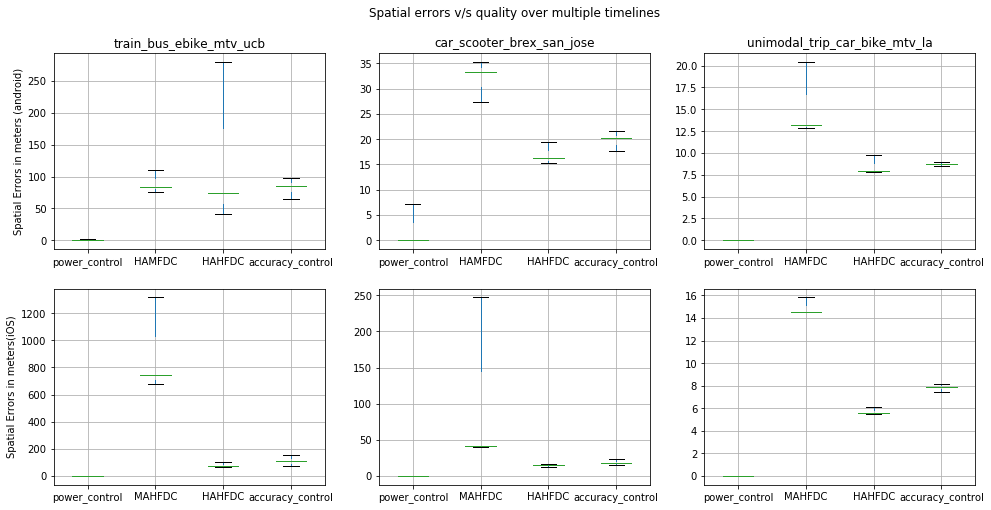

In [15]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(16,8), sharex=False, sharey=False)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    spatial_errors_df.query("timeline == @tl & phone_os == 'android'").boxplot(ax = ax_array[0][i], column=["total_error"], by=["quality"], showbox=False, whis="range")
    ax_array[0][i].set_title(tl)
    spatial_errors_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[1][i], column=["total_error"], by=["quality"], showbox=False, whis="range")
    ax_array[1][i].set_title("")

for ax in ax_array[0]:
    ax.set_xticklabels(q2r_android_list)
    ax.set_xlabel("")

for ax in ax_array[1]:
    ax.set_xticklabels(q2r_ios_list)
    ax.set_xlabel("")

ax_array[0][0].set_ylabel("Spatial Errors in meters (android)")
ax_array[1][0].set_ylabel("Spatial Errors in meters(iOS)")
ifig.suptitle("Spatial errors v/s quality over multiple timelines")
# ifig.tight_layout()

# Plot of Individual Errors (Over each individual run for Android)

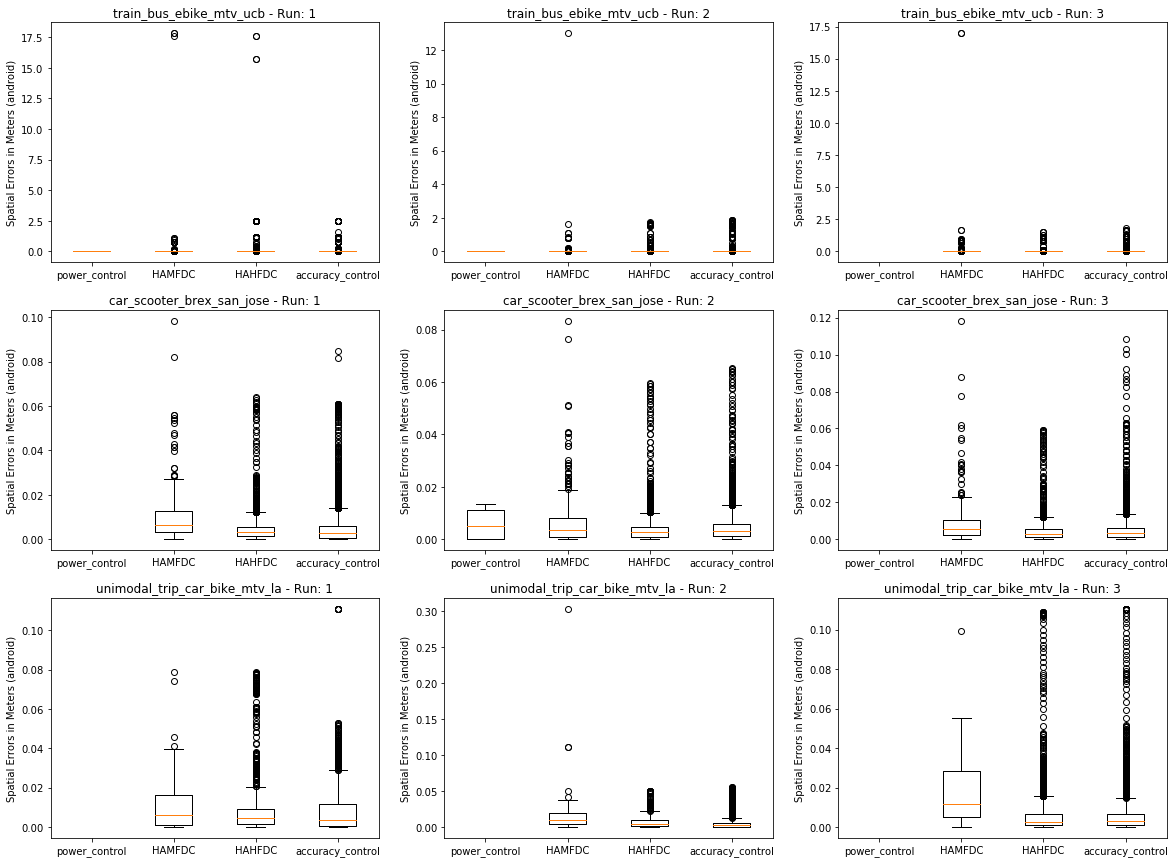

In [17]:
fig = plt.figure(9, figsize=(20, 15))
os = "android"

for i, tl in enumerate(timeline_list):
    for r in range(3):
        data = []
        labels = []
        ax = fig.add_subplot(3,3, (i*len(timeline_list) + r) + 1)
        for q in range(4):
            data.extend(spatial_errors_df.query('timeline == @tl & run == @r & phone_os == @os & quality == @q')['errors'])
            labels.extend(spatial_errors_df.query('timeline == @tl & run == @r & phone_os == @os & quality == @q')['role'])
        ax.set_title(tl + " - Run: " + str(r+1))
        ax.set_xticklabels(labels)
        ax.set_ylabel('Spatial Errors in Meters (android)')
        bp = ax.boxplot(data)

# Plot of Individual Errors (Over each individual run for iOS)

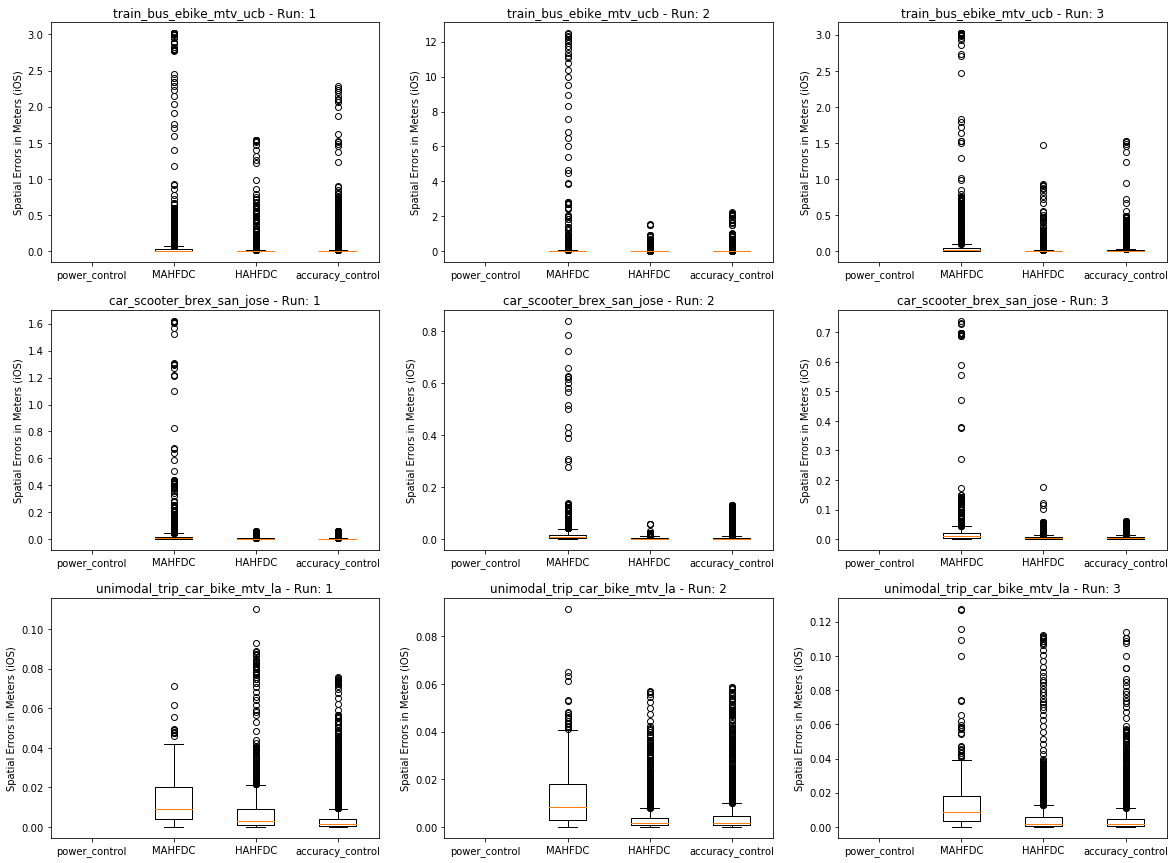

In [18]:
fig = plt.figure(9, figsize=(20, 15))
os = "ios"

for i, tl in enumerate(timeline_list):
    for r in range(3):
        data = []
        labels = []
        ax = fig.add_subplot(3,3, (i*len(timeline_list) + r) + 1)
        for q in range(4):
            data.extend(spatial_errors_df.query('timeline == @tl & run == @r & phone_os == @os & quality == @q')['errors'])
            labels.extend(spatial_errors_df.query('timeline == @tl & run == @r & phone_os == @os & quality == @q')['role'])
        ax.set_title(tl + " - Run: " + str(r+1))
        ax.set_xticklabels(labels)
        ax.set_ylabel('Spatial Errors in Meters (iOS)')
        bp = ax.boxplot(data)